In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../raw_data'

In [17]:
train = pd.read_csv(f'{DATA_PATH}/train.csv')
X = train.drop(columns='Yards')
y = train.Yards

# Shape of the data

In [15]:
### how many rows in the training set ? 
train.shape[0]

682154

In [18]:
### how many features are there ? 
X.shape[1]

48

# Features

In [19]:
### what types of features are there ? 
X.dtypes.value_counts()

object     24
int64      14
float64    10
dtype: int64

In [14]:
### how many games are there ? 
X.GameId.nunique()

688

In [22]:
### how many plays are there per game in average ? 
X.groupby(by='GameId').nunique().PlayId.mean()

45.06831395348837

### Numerical features

In [91]:
X_numerical = X.select_dtypes(include=['int64','float64'])

In [92]:
X_numerical.columns

Index(['GameId', 'PlayId', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir',
       'NflId', 'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'Down',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'DefendersInTheBox', 'PlayerWeight', 'Week',
       'Temperature', 'Humidity'],
      dtype='object')

In [93]:
X_numerical.columns.nunique()

24

No handles with labels found to put in legend.


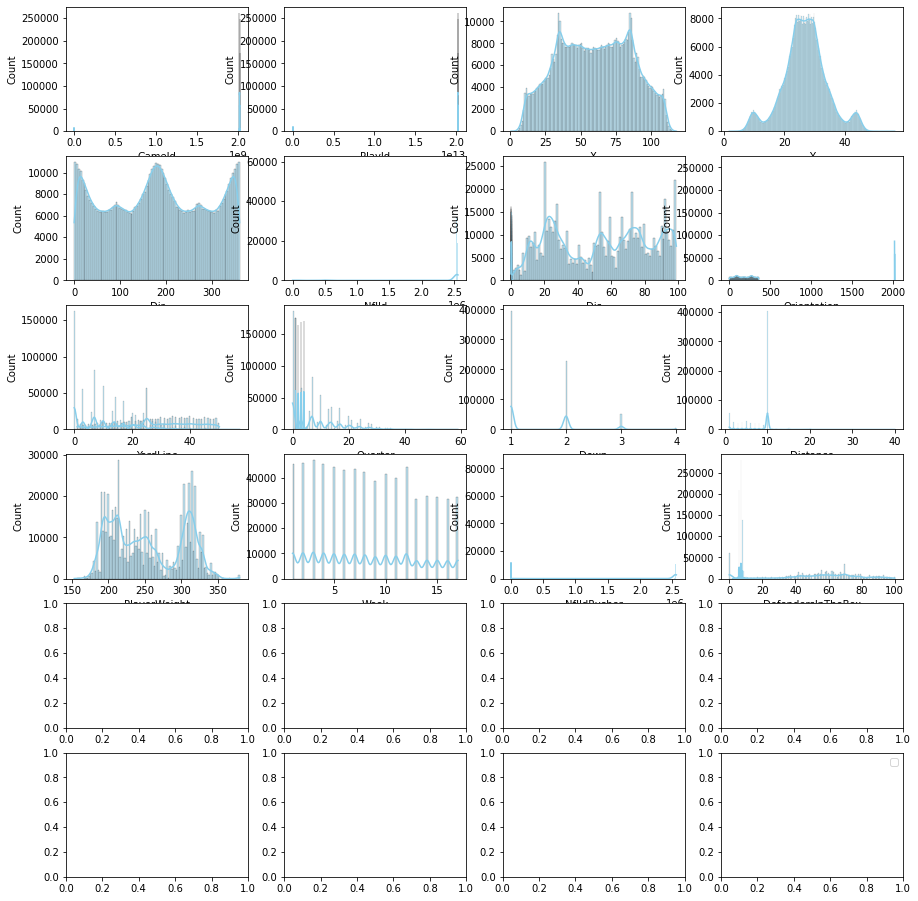

In [89]:
fig, axs = plt.subplots(6, 4, figsize=(15, 16))

for i, col in enumerate(X_numerical.columns):
    sns.histplot(data=X_numerical, x=col, kde=True, color="skyblue", label=col, ax=axs[int(i/6), i%4])

plt.legend()
plt.show()

# GameClock

In [43]:
# what's the minimal game clock
X['GameClock'].min()

'00:00:00'

In [45]:
# what's the maximal game clock
X['GameClock'].max()

'15:00:00'